In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
%matplotlib inline
pd.options.display.max_columns = None

## Data Preprocessing

In [20]:
telco = pd.read_csv("telco_customer_churn.csv")
#first few rows
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Replace ' ' to null valuess and drop data point with null values
telco["TotalCharges"] = telco["TotalCharges"].replace(' ', np.nan)
telco.dropna(inplace=True)

# Change TotalCharges column type to float
telco["TotalCharges"] = telco["TotalCharges"].astype(float)
telco = telco.reset_index()[telco.columns]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
target = 'Churn'

def transform(df):
    # Nominal Data preprocessing with dummy variables
    dfNom = pd.get_dummies(df[cat_features])
    
    # Numerical Data preprocessing with StandardScaler
    # mean = 0 std = 1
    scaler = StandardScaler()
    dfNum = pd.DataFrame(scaler.fit_transform(df[num_features]),columns=num_features)
    
    # Transform target data with LabelEncoder
    le = LabelEncoder()
    dfY = pd.DataFrame(le.fit_transform(df[target]),columns=[target])
    
    # Concat all the dataframe
    output = pd.concat([dfNom,dfNum,dfY],axis='columns')
    return output

In [23]:
telco = transform(telco)
telco.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,-1.280248,-1.161694,-0.994194,0
1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740,0
2,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,-1.239504,-0.363923,-0.959649,1
3,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248,0
4,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,-1.239504,0.196178,-0.940457,1


In [28]:
# Split train and test set
from sklearn.model_selection import train_test_split
X = telco.drop("Churn", axis=1)
y = telco["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

## Model Prediction

In [81]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
# Accuracy score
print("knn Test set score: {}".format(knn.score(X_test, y_test)))
print("lr Test set score: {}".format(lr.score(X_test, y_test)))
print("dct Test set score: {}".format(dct.score(X_test, y_test)))
print("rf Test set score: {}".format(rf.score(X_test, y_test)))

knn Test set score: 0.7639362912400455
lr Test set score: 0.7974971558589306
dct Test set score: 0.732650739476678
rf Test set score: 0.7872582480091013


## Evaluation Model

### Confusion Matrix

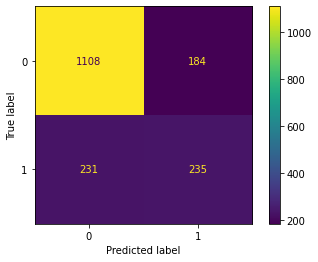

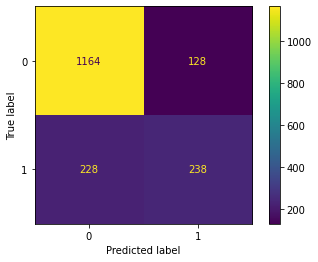

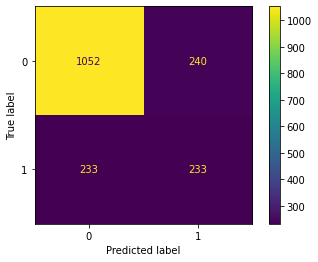

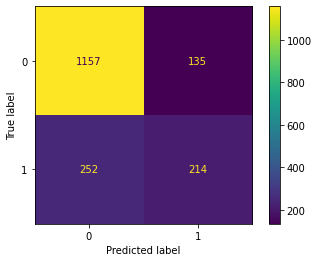

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,values_format='0.0f')
plot_confusion_matrix(lr,X_test,y_test,values_format='0.0f')
plot_confusion_matrix(dct,X_test,y_test,values_format='0.0f')
plot_confusion_matrix(rf,X_test,y_test,values_format='0.0f')

### Evaluation Matrix

<!-- - Accuracy: 
$$\frac {}$$ -->

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [95]:
def eval_metrics(model):
    print()
    # Accuracy
    print("Accuracy: ", accuracy_score(y_test, model.predict(X_test)))
    # Recall
    print("Recall (+): ", recall_score(y_test, model.predict(X_test), pos_label=1))
    print("Recall (-): ", recall_score(y_test, model.predict(X_test), pos_label=0))
    # Precision
    print("Precision (+): ", precision_score(y_test, model.predict(X_test), pos_label=1))
    print("Precision (-): ", precision_score(y_test, model.predict(X_test), pos_label=0))
    # F1 score
    print("F1 score (+): ", f1_score(y_test, model.predict(X_test), pos_label=1))
    print("F1 score (-): ", f1_score(y_test, model.predict(X_test), pos_label=0))
    # Balanced Accuracy Score
    print("Balanced Accuracy Score: ", balanced_accuracy_score(y_test, model.predict(X_test)))

In [96]:
print("k-Nearest Neighbors evaluation metrics: ")
eval_metrics(knn)

k-Nearest Neighbors evaluation metrics: 

Accuracy:  0.7639362912400455
Recall (+):  0.5042918454935622
Recall (-):  0.8575851393188855
Precision (+):  0.5608591885441527
Precision (-):  0.8274831964152353
F1 score (+):  0.5310734463276836
F1 score (-):  0.8422652983656405
Balanced Accuracy Score:  0.6809384924062238


In [97]:
print("Logistic Regression evaluation metrics: ")
eval_metrics(lr)

Logistic Regression evaluation metrics: 

Accuracy:  0.7974971558589306
Recall (+):  0.5107296137339056
Recall (-):  0.9009287925696594
Precision (+):  0.6502732240437158
Precision (-):  0.8362068965517241
F1 score (+):  0.5721153846153846
F1 score (-):  0.8673621460506706
Balanced Accuracy Score:  0.7058292031517825


In [98]:
print("Decision Tree evaluation metrics: ")
eval_metrics(dct)

Decision Tree evaluation metrics: 

Accuracy:  0.7309442548350398
Recall (+):  0.5
Recall (-):  0.8142414860681114
Precision (+):  0.492600422832981
Precision (-):  0.8186770428015564
F1 score (+):  0.49627263045793396
F1 score (-):  0.8164532402017851
Balanced Accuracy Score:  0.6571207430340558


In [99]:
print("Random Forest evaluation metrics: ")
eval_metrics(rf)

Random Forest evaluation metrics: 

Accuracy:  0.7798634812286689
Recall (+):  0.4592274678111588
Recall (-):  0.8955108359133127
Precision (+):  0.6131805157593123
Precision (-):  0.8211497515968772
F1 score (+):  0.5251533742331288
F1 score (-):  0.8567197334320621
Balanced Accuracy Score:  0.6773691518622358


### ROC & AUC

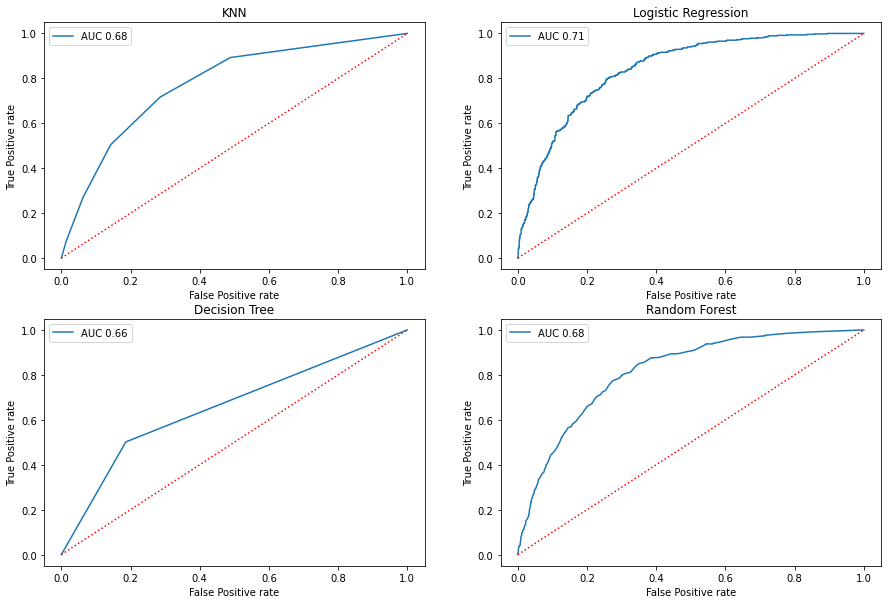

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC
fpr1, tpr1, thres1 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
auc1 = roc_auc_score(y_test, knn.predict(X_test))

fpr2, tpr2, thres2 = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
auc2 = roc_auc_score(y_test, lr.predict(X_test))

fpr3, tpr3, thres3 = roc_curve(y_test, dct.predict_proba(X_test)[:,1])
auc3 = roc_auc_score(y_test, dct.predict(X_test))

fpr4, tpr4, thres4 = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
auc4 = roc_auc_score(y_test, rf.predict(X_test))

plt.figure(figsize=(15,10))
# plt.subplots_adjust(top=1.2,hspace=0.4)

plt.subplot(221)
plt.plot(fpr1, tpr1,label=f'AUC {round(auc1,2)}')
plt.plot([0,1], [0,1], 'r:')
plt.legend(loc='upper left');plt.title('KNN')
plt.xlabel('False Positive rate');plt.ylabel('True Positive rate')

plt.subplot(222)
plt.plot(fpr2, tpr2,label=f'AUC {round(auc2,2)}')
plt.plot([0,1], [0,1], 'r:')
plt.legend(loc='upper left');plt.title('Logistic Regression')
plt.xlabel('False Positive rate');plt.ylabel('True Positive rate')

plt.subplot(223)
plt.plot(fpr3, tpr3,label=f'AUC {round(auc3,2)}')
plt.plot([0,1], [0,1], 'r:')
plt.legend(loc='upper left');plt.title('Decision Tree')
plt.xlabel('False Positive rate');plt.ylabel('True Positive rate')

plt.subplot(224)
plt.plot(fpr4, tpr4,label=f'AUC {round(auc4,2)}')
plt.plot([0,1], [0,1], 'r:')
plt.legend(loc='upper left');plt.title('Random Forest')
plt.xlabel('False Positive rate');plt.ylabel('True Positive rate')

plt.show()